In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
print("Shape of training data:")
print(train_images.shape)
print(train_labels.shape)
print("Shape of test data:")
print(test_images.shape)
print(test_labels.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


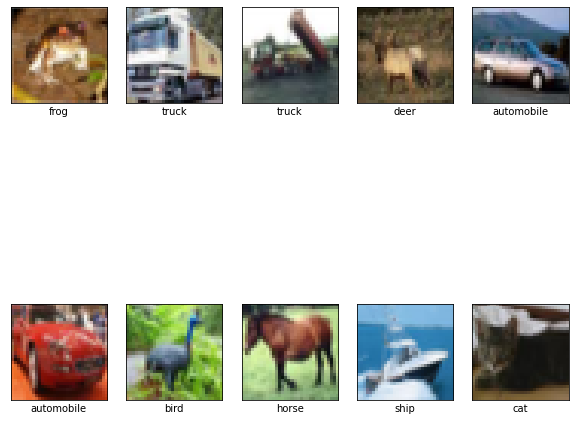

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### The convolutional base

In [2]:
model = Sequential()
model.add(Conv2D(6, (5, 5), (1, 1), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2), (2, 2)))
model.add(Conv2D(16, (5, 5), (1, 1), activation='relu'))
model.add(MaxPooling2D((2, 2), (2, 2)))
model.add(Conv2D(120, (5, 5), activation='relu'))
model.add(Flatten())
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

### Compile and train

In [55]:
def fitted_result(model, learningrate, batch_size, epochs):
  opt = Adam(learning_rate=learningrate)
  model.compile(optimizer=opt,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                metrics=['accuracy'])

  history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs,
                  validation_data=(test_images, test_labels), verbose=0)
  return history

In [46]:
habijabi = fitted_result(model, 0.1, 10000, 25)
habijabi.history['accuracy'][-1]

0.10000000149011612

#### 1. effect of learning rate

In [4]:
habijabi = fitted_result(model, 0.1, 10000, 25)
habijabi.history['accuracy'][-1]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


0.09967999905347824

In [40]:
habijabi = fitted_result(model, 0.01, 1000, 25)
habijabi.history['accuracy'][-1]

0.09811999648809433

In [42]:
habijabi = fitted_result(model, 0.000001, 500, 25)
habijabi.history['accuracy'][-1]

0.10000000149011612

In [37]:
habijabi.history['accuracy'][-1]

0.10063999891281128

In [43]:
rate1 = fitted_result(model, 0.1, 1000, 25)
rate2 = fitted_result(model, 0.01, 1000, 25)
rate3 = fitted_result(model, 0.001, 1000, 25)
rate4 = fitted_result(model, 0.0001, 1000, 25)
rate5 = fitted_result(model, 0.00001, 1000, 25)
rate6 = fitted_result(model, 0.000001, 1000, 25)
rate7 = fitted_result(model, 0.0000001, 1000, 25)

In [44]:
rates = [rate1,rate2,rate3,rate4,rate5,rate6,rate7]
for i in range(len(rates)):
  print(i+1,'th rate:')
  print('accuracy for training data:',rates[i].history['accuracy'][-1])
  print('validation accuracy for test data:',rates[i].history['val_accuracy'][-1],'\n')

1 th rate:
accuracy for training data: 0.1005999967455864
validation accuracy for test data: 0.10000000149011612 

2 th rate:
accuracy for training data: 0.09956000000238419
validation accuracy for test data: 0.10000000149011612 

3 th rate:
accuracy for training data: 0.09777999669313431
validation accuracy for test data: 0.10000000149011612 

4 th rate:
accuracy for training data: 0.09922000020742416
validation accuracy for test data: 0.10000000149011612 

5 th rate:
accuracy for training data: 0.09802000224590302
validation accuracy for test data: 0.10000000149011612 

6 th rate:
accuracy for training data: 0.09901999682188034
validation accuracy for test data: 0.10000000149011612 

7 th rate:
accuracy for training data: 0.10000000149011612
validation accuracy for test data: 0.10000000149011612 



**Ans to 1:**

Although my code structure seems reasonable, some modification to the function fitted_result has given me this almost constant accuracy regardless of the learning rate. However, It appears that the best convergence may occur strongly as we keep decreasing the learning rate. The test data accuracy doesn't rise much. We choose the 7th rate (0.0000001) as the optimized learning rate. 

#### 2. effect of batch size

In [47]:
batch1 = fitted_result(model, 0.000001, 50, 25)
batch2 = fitted_result(model, 0.000001, 100, 25)
batch3 = fitted_result(model, 0.000001, 200, 25)
batch4 = fitted_result(model, 0.000001, 500, 25)
batch5 = fitted_result(model, 0.000001, 1000, 25)
batch6 = fitted_result(model, 0.000001, 2000, 25)
batch7 = fitted_result(model, 0.000001, 4000, 25)

In [50]:
rate4.history['val_accuracy'][-1]

0.10000000149011612

In [51]:
batch4.history['accuracy'][-1]

0.10000000149011612

In [52]:
batches = [batch1,batch2,batch3,batch4,batch5,batch6,batch7] 
for i in range(len(batches)):
  print(i+1,'th batch:')
  print('accuracy for training data:',batches[i].history['accuracy'][-1])
  # print('validation accuracy for test data:',batches[i].history['val_accuracy'][-1],'\n')

1 th batch:
accuracy for training data: 0.10000000149011612
2 th batch:
accuracy for training data: 0.10000000149011612
3 th batch:
accuracy for training data: 0.10000000149011612
4 th batch:
accuracy for training data: 0.10000000149011612
5 th batch:
accuracy for training data: 0.10000000149011612
6 th batch:
accuracy for training data: 0.10000000149011612
7 th batch:
accuracy for training data: 0.10000000149011612


**Ans to 2:**

Accuracy seems to be flat regardless of the batch size. 

#### 3. Best accuracy on the test data
**Ans. to 3:**

Since we already have the accuracy values of the test as we used them as the validation data to save time. So we have tried the different hyperparameters to obtain the best accuracy for the test data. 

We have chosen 0.000001 and 2000 as the learning rate and the batch size. We implement them to find the performance on the test data again below. 

In [56]:
best_performance = fitted_result(model, 0.000001, 2000, 25)

In [57]:
print('for learning rate = 0.000001 and batch size = 2000:\n')
print('Accuracy for test data:', best_performance.history['val_accuracy'][-1])

for learning rate = 0.000001 and batch size = 2000:

Accuracy for test data: 0.10000000149011612


**We found the performance of the test data to be 10.0% correct.**

#### 4. Implement equivalent feed-forward network

If we replace the Conv2D layers by Dense layers, then the maxpooling layers will be redundant. So I removed the maxpooling layers as well.

In [34]:
model2 = Sequential()
model2.add(Flatten())
model2.add(Dense(6, activation='relu'))
# model2.add(Conv2D(6, (5, 5), (1, 1), activation='relu', input_shape=(32, 32, 3)))
# model2.add(MaxPooling2D((2, 2), (2, 2)))
model2.add(Dense(16, activation='relu'))
# model2.add(Conv2D(16, (5, 5), (1, 1), activation='relu'))
# model2.add(MaxPooling2D((2, 2), (2, 2)))
model2.add(Dense(120, activation='relu'))
# model2.add(Conv2D(120, (5, 5), activation='relu'))
model2.add(Flatten())
model2.add(Dense(84, activation='relu'))
model2.add(Dense(10, activation='softmax'))

input_shape=(50000, 32, 32, 3)
model2.build(input_shape)

In [30]:
opt2 = Adam(learning_rate=0.001)
model2.compile(optimizer=opt2,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                metrics=['accuracy'])

model2.fit(train_images, train_labels, batch_size=10000, epochs=25, verbose=0) 

In [33]:
score = model2.evaluate(test_images, test_labels, verbose=0)
print("Model accuracy: %.2f"% (score[1]*100))

Model accuracy: 31.78


**Ans to 4.a**

a) So the performance or the accurance is 31.78%

In [35]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (50000, 3072)             0         
                                                                 
 dense_12 (Dense)            (50000, 6)                18438     
                                                                 
 dense_13 (Dense)            (50000, 16)               112       
                                                                 
 dense_14 (Dense)            (50000, 120)              2040      
                                                                 
 flatten_6 (Flatten)         (50000, 120)              0         
                                                                 
 dense_15 (Dense)            (50000, 84)               10164     
                                                                 
 dense_16 (Dense)            (50000, 10)              

**Ans to 4.b**

b) There are 31,604 parameters. The LeNet implementation had 62,006 parameters. So this model has much less of them. I think the 2nd network is better.  